This notebook is used to debug YOLO annotations, it allows for visualising an annotation placed onto an image

In [2]:
import cv2
import matplotlib.pyplot as plt

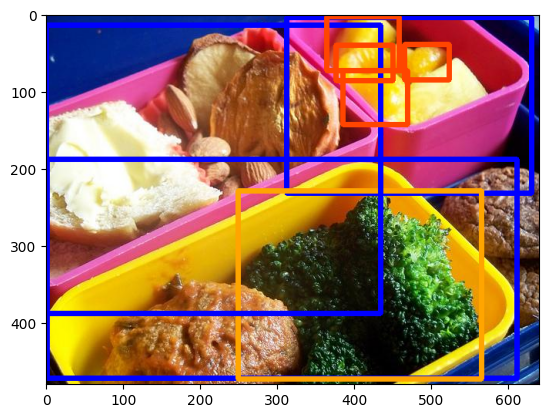

In [11]:
# Change these variables as required
# IMAGE_PATH = "/home/aidan/Desktop/ugent_00025.jpg"
# YOLO_PATH = "/home/aidan/Desktop/ugent_00025.txt"
IMAGE_PATH = "/home/aidan/dissertation/unity_frames/frame_196.png"
YOLO_PATH = "/home/aidan/dissertation/unity_frames/frame_196_yolo.txt"
# IMAGE_PATH = "/home/aidan/Downloads/archive/coco128/images/train2017/000000000009.jpg"
# YOLO_PATH = "/home/aidan/Downloads/archive/coco128/labels/train2017/000000000009"
#######

CLASS_COL_MAP = {
    0: (0,0,255),
    1: (255,165,0),
    2: (255,69,0),
    3: (255,255,0),
}

img = cv2.cvtColor(cv2.imread(IMAGE_PATH), cv2.COLOR_BGR2RGB)
with open(YOLO_PATH, "r") as file:
    yolo = [list(map(float, line.split(' '))) for line in file.readlines()]

for annotation in yolo:
    x1, y1 = (int(annotation[1]*img.shape[1]), int(annotation[2]*img.shape[0]))
    width, height = (int(annotation[3]*img.shape[1]), int(annotation[4]*img.shape[0]))

    # print(x1, y1)

    # print((x1 - x2)/(y1-y2))
    img = cv2.rectangle(img, (x1-(width//2), y1-(height//2)), (x1+(width//2), y1+(height//2)), CLASS_COL_MAP[int(annotation[0])], 5)

plt.imshow(img)